#### Compare MTurk UQ annotations with Perspective API's toxicity score:

- Note: the code to retrieve toxicity scores is in <i>./toxicity.py</i>

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('/home/ndg/users/sbagga1/unpalatable-questions/results/data_with_toxicity_score_MTurk.csv',
                lineterminator='\n')
print(df.shape)
df.head()

(10909, 12)


,question,reply_text,comment_text,comment_id,reply_id,subreddit,label,confidence,all_text,P_API_question,P_API_reply_text,P_API_all_text
0,"If he didn't rape, he wouldn't have been accus...","If he didn't rape, he wouldn't have been accus...",Its also based on the rape charges he faced an...,cyvj6ds,cyvwdqp,TumblrInAction,yes_unpalatable,0.6,Its also based on the rape charges he faced an...,0.409448,0.409448,0.363043
1,Is high score bad?,Is high score bad? haha,He scored 14 goals!? He broke the 3 goal limit...,czy0u0n,czykv63,sports,not_unpalatable,1.0,He scored 14 goals!? He broke the 3 goal limit...,0.067840,0.094005,0.071952
2,So they're saying that you can't win against a...,"To add on to that, when you checkmate somone, ...",To say that all christians are pawns with no k...,czraq2e,czrbxyh,CringeAnarchy,not_unpalatable,1.0,To say that all christians are pawns with no k...,0.150468,0.177995,0.251250
3,The Cavs or all of us?,The Cavs or all of us?,He's gotta be trolling at this point,d18cwr9,d18ebdl,nba,not_unpalatable,1.0,He's gotta be trolling at this point The Cavs ...,0.053015,0.053015,0.123554
4,"I drive a cobalt, am I going to get blue hair?","I drive a cobalt, am I going to get blue hair?",I've never associated blue hair with cobalt ex...,d1ox7zz,d1q5sa4,ImGoingToHellForThis,not_unpalatable,1.0,I've never associated blue hair with cobalt ex...,0.060542,0.060542,0.121232


### Scatterplots:

Text(0.5, 1.0, 'Question Text only')

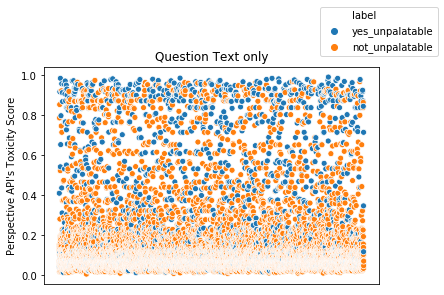

In [3]:
p1 = sns.scatterplot(x='reply_id', y='P_API_question', data=df, hue='label')
p1.set_xticks([])
p1.set_xlabel('')
p1.set_ylabel("Perspective API's Toxicity Score")

p1.legend(loc='upper center', bbox_to_anchor=(1, 1.3))
p1.set_title('Question Text only', fontsize=12)

# fig = p1.get_figure()
# fig.savefig("./QuestionOnly.png", bbox_inches="tight", dpi=500)

# p1.legend(loc='upper center', bbox_to_anchor=(1, 1.15), ncol=3, fancybox=True, shadow=False,
#           labels=['Unpalatable', 'Clean'])

Text(0.5, 1.0, 'Full Reply text')

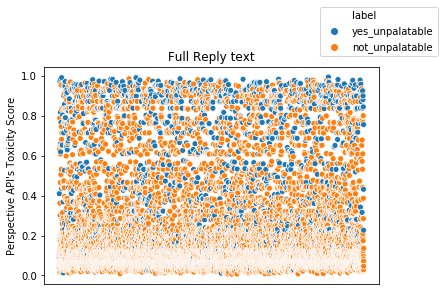

In [5]:
p1 = sns.scatterplot(x='reply_id', y='P_API_reply_text', data=df, hue='label')
p1.set_xticks([])
p1.set_xlabel('')
p1.set_ylabel("Perspective API's Toxicity Score")
p1.legend(loc='upper center', bbox_to_anchor=(1, 1.3))
p1.set_title('Full Reply text', fontsize=12)

# fig = p1.get_figure()
# fig.savefig("./ReplyOnly.png", bbox_inches="tight", dpi=500)

Text(0.5, 1.0, 'Comment + Reply')

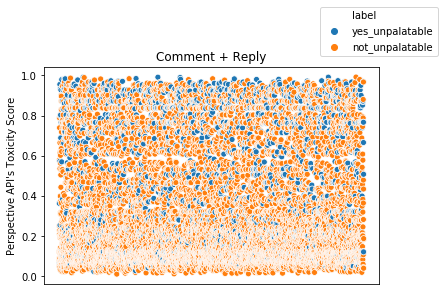

In [6]:
p1 = sns.scatterplot(x='reply_id', y='P_API_all_text', data=df, hue='label')
p1.set_xticks([])
p1.set_xlabel('')
p1.set_ylabel("Perspective API's Toxicity Score")
p1.legend(loc='upper center', bbox_to_anchor=(1, 1.3))

p1.set_title('Comment + Reply', fontsize=12)

# fig = p1.get_figure()
# fig.savefig("./BothCommentReply.png", bbox_inches="tight", dpi=500)

### Boxplots:

Text(0.5, 1.0, 'Question Text only')

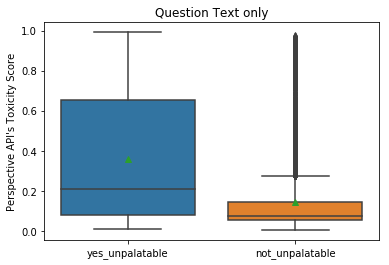

In [7]:
p1 = sns.boxplot(x='label', y='P_API_question', data=df, showmeans=True)
p1.set_xlabel('')
p1.set_ylabel("Perspective API's Toxicity Score")

p1.set_title('Question Text only', fontsize=12)

# fig = p1.get_figure()
# fig.savefig("./BoxPlot_QuestionOnly.png", bbox_inches="tight", dpi=500)

Text(0.5, 1.0, 'Full Reply Text')

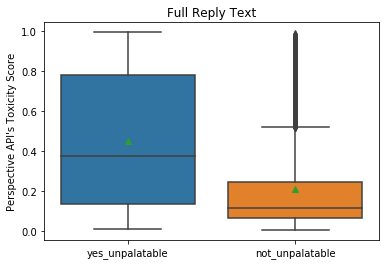

In [8]:
p1 = sns.boxplot(x='label', y='P_API_reply_text', data=df, showmeans=True)
p1.set_xlabel('')
p1.set_ylabel("Perspective API's Toxicity Score")

p1.set_title('Full Reply Text', fontsize=12)

# fig = p1.get_figure()
# fig.savefig("./BoxPlot_ReplyOnly.png", bbox_inches="tight", dpi=500)

Text(0.5, 1.0, 'Comment + Reply')

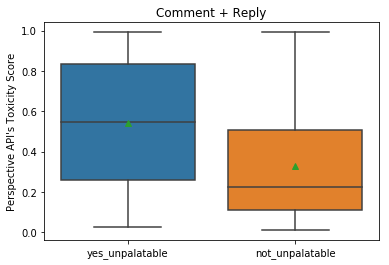

In [9]:
p1 = sns.boxplot(x='label', y='P_API_all_text', data=df, showmeans=True)
p1.set_xlabel('')
p1.set_ylabel("Perspective API's Toxicity Score")

p1.set_title('Comment + Reply', fontsize=12)

# fig = p1.get_figure()
# fig.savefig("./BoxPlot_BothCommentReply.png", bbox_inches="tight", dpi=500)

In [10]:
pd.set_option('display.max_colwidth', -1)
temp = df[['P_API_question', 'P_API_reply_text', 'P_API_all_text', 'label', 'confidence', 'reply_text', 
           'comment_text']]

In [14]:
temp.loc[(temp['P_API_question']<0.2) & (temp['label']=='yes_unpalatable')].head()

,P_API_question,P_API_reply_text,P_API_all_text,label,confidence,reply_text,comment_text
11,0.041141,0.041141,0.065073,yes_unpalatable,0.6,"If this is downvoted for being a low effort comment, isn't OP a low effort poster?",https://en.wikipedia.org/wiki/Brokered_convention\n\n/r/politicalgooglesearches
19,0.043493,0.085597,0.571778,yes_unpalatable,0.6,Seriously? It's a tail feather... This pic is just taken at the right angle and lighting.,Who the hell accepted that costume design?
27,0.114270,0.114270,0.254388,yes_unpalatable,0.6,"Is Trump's increased welfare state his healthcare plan, according to you?","Oh loveflu, when socialism is on the line, and one of the Republicans is advertising an increased welfare state (and leading the polls), there's a lot more that matters. And Cruz hasn't gone on Univision promising amnesty..."
33,0.057699,0.057699,0.071463,yes_unpalatable,0.8,Common sense?,Oh. ^(Seriously guys please tell me.)
48,0.089352,0.619220,0.802834,yes_unpalatable,0.6,"And this is why your little ""movement"" will die befor it starts. You guys attack anyone who isn't pure enough. You guys can love someone one day and if you happen to disagree on a little thing you distroy that person on the next. Why would anyone want to represent your movement now, when they know it could be them any day?",I don't give a shit what Ms. Warren has to say anymore.


- Perspective API is biased towards longer text: the box plots move upward for both labels as the input text gets longer. Mostly all it's really looking at is the presence of 'bad' words.

#### Unpalatable example where Perspective fails:
- Comment: Counting stats mean nothing. Monta Ellis averaged 23-25 a game for a lot of his career. So what? He's not very good.
- Reply: Do you even read what you type? One season with the warriors he was averaging 25.5-4-5 and 2.2 steals a game... and you say Monte Ellis is not very good... smh
- Question 0.09 | Others ~0.2

#### Not Unpalatable example where Perspective fails:
- Comment: There is a comma and a question mark missing: "Fuck**,** you mean you are keeping it**?** Punctuation is important guys!
- Reply: I think it's more like \n\nWhat the fuck do you mean you're going to keep it?
- Question 0.9 | Reply 0.83 | Both 0.92

### More examples:
#### Unpalatable example where Perspective does well:
- Comment: Thank god I'm not murican and need to French my tongue and post about it on a Pakistani carpet weaving board.
- Reply: The fuck are you on about?
- Reply 0.92 | Both 0.85
    
#### Unpalatable example where Perspective semi-fails:
- Comment: wtf is wrong with you
- Reply: Did you *read* the comment I replied to?
- Reply 0.07 | Both 0.68

#### Unpalatable example where Perspective fails:
- Comment: My father is a physician and he keeps a copy of this on his wall, and I fail to see anything wrong with physicians actually following it.
- Reply: But if you take the oath without believing in the old gods, aren't you being a little bit hypocritical?
- All three values are ~0.2

#### Not Unpalatable example where Perspective does well:
- Comment: People were there some as much as 5 hours early. Bring water and snacks
- Reply: Ya they are starting to shuttle people at 1230, so get there around 11?
- All three values are 0.09

#### Not Unpalatable example where Perspective semi-fails:
- Comment: Best summary I've read about it so far. I tuned in at 7) and that's all I've really ever seen
- Reply: Damn it it's deleted. What it say? I don't know what gamergate is either.
- Question 0.07 | Reply 0.71 | Both 0.47

#### Not Unpalatable example where Perspective fails:
- Comment: There is a comma and a question mark missing: "Fuck**,** you mean you are keeping it**?** Punctuation is important guys!
- Reply: I think it's more like \n\nWhat the fuck do you mean you're going to keep it?
- Question 0.9 | Reply 0.83 | Both 0.92

- Comment: I get this where I work... We have an asiago bagel and people pronounce it asagio. Or they pronounce arugula as argulia (what?) Drives me nuts.
- Reply: Why are dumb people still a thing.?
- Reply 0.85 | Both 0.73

# fin.